In [3]:
import pandas as pd
import numpy as np

In [6]:
experimento= { "sujeto": ["S01","S02","S03", "S01","S01","S02"],
               "sabor":["chocolate","piñon","queso","angel","vainilla","choco"],
               "precio":[45,105,30,60,85,120],
               "tamaño":["med","gra","ch","med","gra","ch"]}

In [7]:
dafra=pd.DataFrame(experimento)

In [11]:
dafra["activación"]= [True,True,False,False,True,True] #agregar columna
print(dafra)

  sujeto      sabor  precio tamaño  activación
0    S01  chocolate      45    med        True
1    S02      piñon     105    gra        True
2    S03      queso      30     ch       False
3    S01      angel      60    med       False
4    S01   vainilla      85    gra        True
5    S02      choco     120     ch        True


In [13]:
dafra.sujeto

0    S01
1    S02
2    S03
3    S01
4    S01
5    S02
Name: sujeto, dtype: object

In [15]:
dafra[dafra["sujeto"]== "S01"] #filtrado condicional a todas las filas que cumplen la condicion

,sujeto,sabor,precio,tamaño,activación
0,S01,chocolate,45,med,True
3,S01,angel,60,med,False
4,S01,vainilla,85,gra,True


In [16]:
dafra[dafra["precio"]>100]

,sujeto,sabor,precio,tamaño,activación
1,S02,piñon,105,gra,True
5,S02,choco,120,ch,True


In [19]:
por_sujeto=dafra.groupby(by="sujeto")
por_sujeto.describe(include="all")

sabor                                                       ...  \
       count unique        top freq mean  std  min  25%  50%  75%  ...   
sujeto                                                             ...   
S01        3      3  chocolate    1  NaN  NaN  NaN  NaN  NaN  NaN  ...   
S02        2      2      piñon    1  NaN  NaN  NaN  NaN  NaN  NaN  ...   
S03        1      1      queso    1  NaN  NaN  NaN  NaN  NaN  NaN  ...   

       activación                                                 
           unique    top freq mean  std  min  25%  50%  75%  max  
sujeto                                                            
S01             2   True    2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
S02             1   True    2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
S03             1  False    1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[3 rows x 44 columns]

In [5]:
tipos_sujetos= ["S"+ str(i).zfill(2)for i in range (4)]
generos=["M","F"]
condicion=["control","experimental"]
region=["hipocampo","PFC","amígdala"]
neurotransmisores=["dopamina","serotonina"]
#crear DF 200 filas
#las columnas que están arriba con distr normal
#agregar col llamada precisión con dstr normal y mu= 0.92 y sigma= 0.08
#se pretenden simular los datos de un estudio en el que se miden las var cognitivas y fisiológicas en
#dif regiones cerebrales sujetos y condiciones


In [6]:
n = 200
sujetos = np.random.choice(tipos_sujetos, n)
sexos = np.random.choice(generos, n)
condiciones = np.random.choice(condicion, n)
regiones = np.random.choice(region, n)
neurots = np.random.choice(neurotransmisores, n)

# precisión ~ Normal(0.92, 0.08)
precision = np.random.normal(loc=0.92, scale=0.08, size=n)

# limitar precisión entre 0 y 1 (si se quiere realista como proporción)
precision = np.clip(precision, 0, 1)

# crear DataFrame
df = pd.DataFrame({
    "Sujeto": sujetos,
    "Genero": sexos,
    "Condicion": condiciones,
    "Region": regiones,
    "Neurotransmisor": neurots,
    "Precision": precision
})


  Sujeto Genero     Condicion     Region Neurotransmisor  Precision
0    S01      F       control  hipocampo        dopamina   0.941285
1    S03      F  experimental        PFC        dopamina   0.922874
2    S00      F       control        PFC      serotonina   0.751841
3    S01      M  experimental  hipocampo        dopamina   1.000000
4    S00      M       control        PFC        dopamina   1.000000


In [7]:
df

,Sujeto,Genero,Condicion,Region,Neurotransmisor,Precision
0,S01,F,control,hipocampo,dopamina,0.941285
1,S03,F,experimental,PFC,dopamina,0.922874
2,S00,F,control,PFC,serotonina,0.751841
3,S01,M,experimental,hipocampo,dopamina,1.000000
4,S00,M,control,PFC,dopamina,1.000000
...,...,...,...,...,...,...
195,S00,F,control,hipocampo,serotonina,0.829369
196,S02,F,control,amígdala,serotonina,0.877471
197,S02,M,control,hipocampo,dopamina,0.913712
198,S00,M,control,PFC,serotonina,1.000000


In [9]:
#generar h8istograma de cuantos datos por sujeto se tienen y mostrar en un histograma la proporcion de neurotransmisor

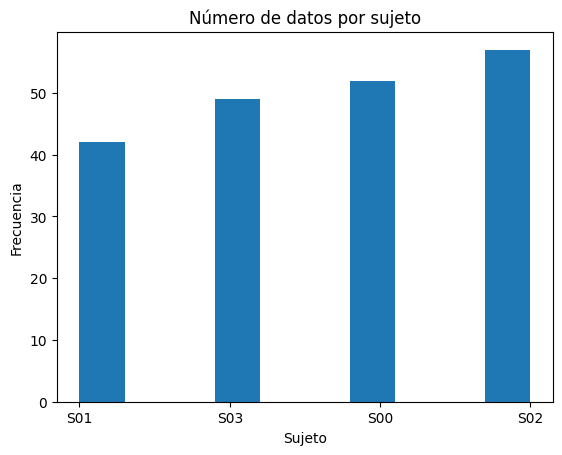

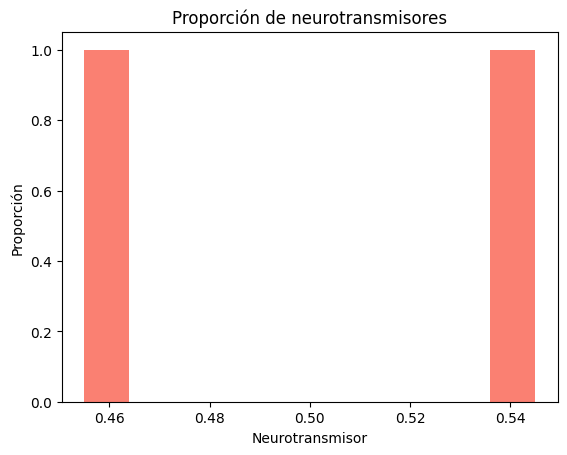

In [15]:
import matplotlib.pyplot as plt

#  Histograma 1: conteo de datos por sujeto
df['Sujeto'].value_counts().sort_index()
plt.hist(df["Sujeto"])
plt.title("Número de datos por sujeto")
plt.xlabel("Sujeto")
plt.ylabel("Frecuencia")
plt.show()

# Histograma 2: proporción de neurotransmisores 
plt.hist(df['Neurotransmisor'].value_counts(normalize=True),color=['salmon'])
plt.title("Proporción de neurotransmisores")
plt.xlabel("Neurotransmisor")
plt.ylabel("Proporción")
plt.show()


In [ ]:
#para cada sujeto calcular la proporción del tipo de condición
#para cada sujeto, calcular el máximo, mínimo y la media de su precisión
#para cada condición, hacer el histograma de las regiones activadas
#y hacerlo mediante 2 métodos: filtrado de dataframes y usando groupby
df['Sujeto'].value_counts()